In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [73]:
def W2_derivative(T,Y,Z):
    #M = Z.shape[1]
    #N,K = T.shape 
    
    #deltaW2 = np.zeros((M,K)) 
    
    #for n in xrange(N):
    #   for m in xrange(M):
    #        for k in xrange(K):
    #            deltaW2[m,k] += (T[n,k]-Y[n,k])*Z[n,m]
    temp = (T-Y)
    return Z.T.dot(temp)

In [74]:
def b2_derivative(T,Y):
    #N,K = T.shape
    #deltab2 = np.zeros(K)
    #for n in xrange(N):
    #    deltab2 = deltab2 + (T[n,:] - Y[n,:])
    temp = (T-Y)
    return temp.sum(axis=0)

In [75]:
def w1_derivative(T,Y,Z,W2,X):
#     N,D = X.shape[1]
#     M = Z.shape[1]
#     K = T.shape[1]
    
#     deltaw1 = np.zeros(D,M)
    
#     for n in xrange(N)
#         for d in xrange(D):
#             for m in xrange(M):
#                 temp = Z[n,m]*(1-Z[n,m])*X[n,d]
#                 temp2 = 0
#                 for k in xrange(K):
#                     temp2 += (T[n,k]-Y[n,k])*W2[m,k] 
#                 deltaw2[d][m] = temp*temp2
    return ((X.T).dot(((T-Y).dot(W2.T))*Z*(1-Z)))

In [76]:
def b1_derivative(T,Y,Z,W2):
        temp =  ((T-Y).dot(W2.T))*Z*(1-Z)
        return temp.sum(axis=0)

In [77]:
def forward(X,W1,b1,W2,b2):
        a1 = X.dot(W1) + b1
        Z1 = 1/(1+np.exp(a1))
        a2 = Z1.dot(W2) + b2
        expa2 = np.exp(a2)
        expasum = np.sum(expa2,axis=1,keepdims=True)
        expa2 = expa2/expasum
        return expa2,Z1

In [82]:
def costf(Y,T):
    print(Y.shape)
    print(T.shape)
    tot =  T*np.log(Y)
    return tot.sum()

In [79]:
def classification_rate(Y,P):
    return np.mean(Y==P)

In [99]:
def main():
    Nclass = 500
    D = 2
    M = 3
    K = 3
    X1 = np.random.randn(Nclass,D) + np.array([0,-2])
    X2 = np.random.randn(Nclass,D) + np.array([2,2])
    X3 = np.random.randn(Nclass,D) + np.array([-2,2])
    X = np.vstack((X1,X2,X3))
    classesT = np.array([[0]*Nclass + [1]*Nclass + [2]*Nclass])
    classes = classesT.reshape(-1,1)
    plt.scatter(X[:,0],X[:,1],c=classes,alpha=0.5)
    
    
    #initializing the weights
    W1 = np.random.randn(D,M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M,K)
    b2 = np.random.randn(K)
    
    enc = OneHotEncoder(sparse=False)
    T = enc.fit_transform(classes)
    
    #num of epochs
    epochs = 10000
    costs = []
    learning_rate = 10e-7
    for epoch in xrange(epochs):
        output,hidden = forward(X,W1,b1,W2,b2)
        if epoch%100==0:
            cost = costf(output,T)
            pred = np.argmax(output,axis=1)
            c_rate = classification_rate(pred,classesT)
            print "Cost is:",cost,"Prediction rate:",c_rate
            costs.append(cost) 
        W2 += learning_rate*W2_derivative(T,output,hidden)
        b2 += learning_rate*b2_derivative(T,output)
        W1 += learning_rate*w1_derivative(T,output,hidden,W2,X)
        b1 += learning_rate*b1_derivative(T,output,hidden,W2)
    plt.plot(costs)

(1500L, 3L)
(1500L, 3L)
Cost is: -2800.42062536 Prediction rate: 0.333333333333
(1500L, 3L)
(1500L, 3L)
Cost is: -2714.03869605 Prediction rate: 0.333333333333
(1500L, 3L)
(1500L, 3L)
Cost is: -2652.38700598 Prediction rate: 0.333333333333
(1500L, 3L)
(1500L, 3L)
Cost is: -2614.37572225 Prediction rate: 0.327333333333
(1500L, 3L)
(1500L, 3L)
Cost is: -2597.66671911 Prediction rate: 0.312
(1500L, 3L)
(1500L, 3L)
Cost is: -2598.79433042 Prediction rate: 0.28
(1500L, 3L)
(1500L, 3L)
Cost is: -2613.44223798 Prediction rate: 0.241333333333
(1500L, 3L)
(1500L, 3L)
Cost is: -2636.86914698 Prediction rate: 0.200666666667
(1500L, 3L)
(1500L, 3L)
Cost is: -2664.42914039 Prediction rate: 0.171333333333
(1500L, 3L)
(1500L, 3L)
Cost is: -2692.0730125 Prediction rate: 0.144
(1500L, 3L)
(1500L, 3L)
Cost is: -2716.69715674 Prediction rate: 0.120666666667
(1500L, 3L)
(1500L, 3L)
Cost is: -2736.26320859 Prediction rate: 0.106666666667
(1500L, 3L)
(1500L, 3L)
Cost is: -2749.70862705 Prediction rate: 0.09

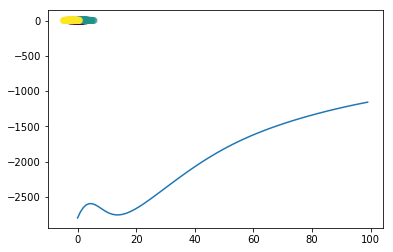

In [100]:
if __name__=="__main__":
    main()